# Balloon to the Stratosphere

Use a balloon to launch a glider and climb in stratospheric wave to a higher altitude. As opposed to the Perlan project, this would not require a turbine tow aircraft and the disconnect altitude could be substantially higher.

A Commercial Astronaut is a pilot who achieves an altitude of greater than 50 miles or 264,000 feet. So this isn't about a flight to space, this is about  
(1) How high can we go to the stratosphere with no propulsion?  
(2) Can we use this transport modality achieve substantial distances at minimal operating cost? Compare to a turbine tow aircraft. 

Examples of large-scale balloons:  
    • Modern blimps fly below 5000 feet.  
    • German dergibles flew at altitudes of 10-20,000 feet.  
    • High-altitude balloons reach burst altitudes of 40-110,000 feet.  

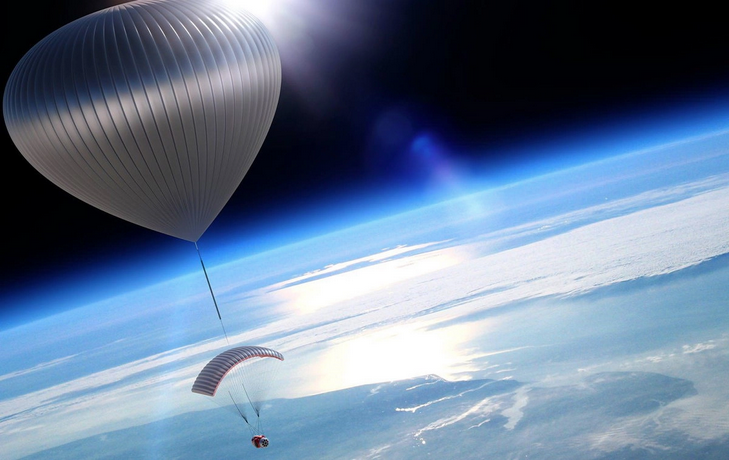
<center>Photo: World View Enterprises</center>

Tools to model an inflatible volume Include Solidworks Flatten feature and ExactFlat which optimizes cutting bed layout for production. 

## Load Libraries

In [1]:
from math import pi

## Research
|      Name |   Fill Volume[m^3]  | Weight[kg] | Payload[kg] | Source/Manufacturer | Cost [USD]  
|-----------|----------------------|--------|---------|------------------------------------  
| StratoFlights 3000 |  8.2997 |   3  |   3   | www.stratoflights.com/en/ | 877  
| Nasa Super Pressure Balloon | 532,000 | ??? | ??? | AeroStar | ???  

## Bouyancy Calculation

Summation of forces in Vertical Axis:  
> F_net = F_bouyancy - Weight  

Where,  

> Weight =  weight_payload + weight_balloon   
    Lift = ( $\rho$\_air - $\rho$\_Lift_Gas) \* g \* V   

### Example problem of a 20 m^3 weather balloon:

In [2]:
## Constants
g = 9.807  # m/s^2
rho_air = 1.205  # kg/m^3
# rho_lift_gas = 0.0899 # kg/m^3 # Hydrogen, illegal according to FAA
rho_lift_gas = 0.181  # kg/m^3 # Helium
rho_lift_gas = 0.946  # [kg/m^3] # Hot air

In [3]:
## Given
m_balloon = 1.2  # [kg]
m_payload = 1.2  # [kg]
sf = 1.5  # Safety factor, establishes the assent rate.

# Balloon Volume
volume = 20  # [m^3]
# - OR -
# Sphere
# radius = 0.4;
# volume = (4/3)*pi*radius**3;
print('Balloon Volume =', volume, '[m^3]')

Balloon Volume = 20 [m^3]


In [4]:
# Calculations
weight_balloon = m_balloon * g
weight_payload = m_payload * g
weight = weight_payload + weight_balloon
weight_standard = 0.2248 * weight  # N->lb_f
print('Weight =', round(weight, 3), '[N]',
      'or', round(weight_standard, 2), '[lb_f]')

Weight = 23.537 [N] or 5.29 [lb_f]


In [5]:
f_lift = volume * (rho_air - rho_lift_gas) * g
f_lift_standard = 0.2248 * f_lift  # N->lb_f
print('Lift =', round(f_lift, 3), '[N]',
      'or', round(f_lift_standard, 3), '[lb_f]')

f_net = f_lift - weight
# print('Force_Net =', round(f_net,3), '[N]')

Lift = 50.8 [N] or 11.42 [lb_f]


Reality Check: Lift must exceed safety factor times weight or a larger balloon is needed.

In [9]:
if f_lift >= sf * weight:
    print('Test Passed!', 'Lift:', round(f_lift, 2),
          '[N] >=', 'sf * Weight:', round((sf) * weight, 2), '[N]')
else:
    print('Test Failed!', 'Larger balloon required.', 'Lift:', round(f_lift, 2),
          '[N] <', 'sf * Weight:', round((sf) * weight, 2), '[N]')

Test Passed! Lift: 50.8 [N] >= sf * Weight: 35.31 [N]


## Conclusion

Data on small weather balloons is readily available what is not is information on larger-scale balloons. To further this analysis research into the cost / volume / weight of LEO-satellite-scale balloons is needed. Aerostar is NASA's vendor for large-scale high-altitude balloons. At the conclusion of this analysis Aerostar was contacted for further details, the author is waiting to recieve specifics on >600lb payload capacity balloons.


## Resources

1. Airships, Blimps, & Aerostats, https://eaglepubs.erau.edu/introductiontoaerospaceflightvehicles/chapter/lth/, 10/08/2024
2. Hot Air Balloons - Calculate the Lifting Force , https://www.engineeringtoolbox.com/hot-air-balloon-lifting-force-d_562.html, 10/08/2024
3. NASA's Super Pressure Balloon from Aerostar, https://www.nasa.gov/centers-and-facilities/wallops/lift-off-nasas-super-pressure-balloon-takes-flight-from-new-zealand/